In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [3]:
# Dont need to do this if not using the other columns
#df['year'] = df.date.dt.year
#df['month'] = df.date.dt.month
#df['day'] = df.date.dt.day
#df['hour'] = df.date.dt.hour
#df['minute'] = df.date.dt.minute
#df['second'] = df.date.dt.second
#df.head(15)

In [4]:
df = df.set_index('date').sort_index()

In [5]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


Text(0, 0.5, 'Temperature')

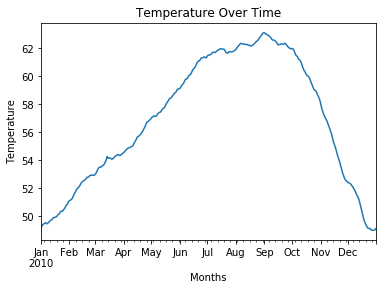

In [6]:
# Can run with df.resample('D').mean().plot()
df.resample('D').mean().temp.plot()
plt.title("Temperature Over Time")
plt.xlabel("Months")
plt.ylabel("Temperature")

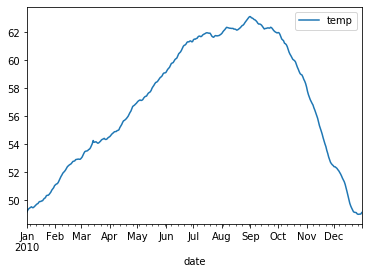

In [7]:
# Shows legend
df.resample('D').mean().plot()

# 2. Write the code necessary to visualize the minimum temperature over time.

Text(0, 0.5, 'Temperature')

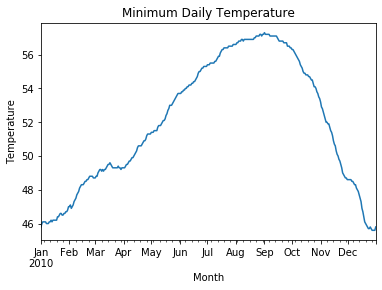

In [8]:
min_temp = df.resample('D').min().temp
min_temp.plot()
plt.title('Minimum Daily Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')

# 3. Write the code necessary to visualize the maximum temperature over time.

Text(0, 0.5, 'Temperature')

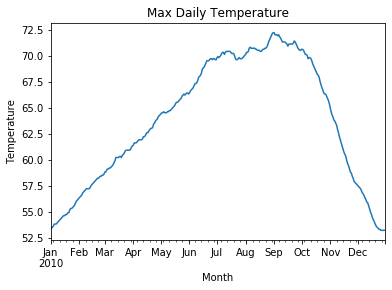

In [9]:
max_temp = df.resample('D').max().temp
max_temp.plot()
plt.title('Max Daily Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')

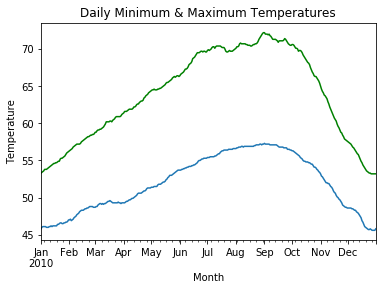

In [10]:
min_temp.plot()
max_temp.plot(color='green')
plt.title('Daily Minimum & Maximum Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

# 4. Which month is the coldest, on average?

In [11]:
# temp_reading gives you the average min temp
temp_reading = df.resample('M').temp.mean().min()
# Selects the coldest month on average
coldest_month = df.resample('M').mean().idxmin()[0]
# Converts the string into the month name with .strftime('%B')
coldest_month = coldest_month.strftime('%B')
print(f'{coldest_month} was the coldest month on an average at {round(temp_reading,2)} degrees fahrenheit')

January was the coldest month on an average at 49.98 degrees fahrenheit


# 5. Which month has the highest average temperature?

In [12]:
# temp_reading gives you the average max temp
temp_reading = df.resample('M').mean().temp.max()
# Selects the warmest month on average
warmest_month = df.resample('M').mean().idxmax()[0]
# Converts the string into the month name with .strftime('%B')
warmest_month = warmest_month.strftime('%B')
print(f'{warmest_month} was the warmest month on an average at {round(temp_reading,2)} degrees fahrenheit')

September was the warmest month on an average at 62.49 degrees fahrenheit


# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [15]:
# Resampling day to aggregate for min and max
df = df.resample('D')['temp'].agg(['min','max'])

KeyError: 'Column not found: temp'

In [16]:
df.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


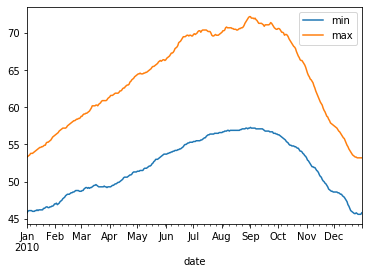

In [14]:
df.plot()

In [17]:
df['variability'] = df['max'] - df['min']
df.head()

,min,max,variability
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


Text(0, 0.5, 'Degrees')

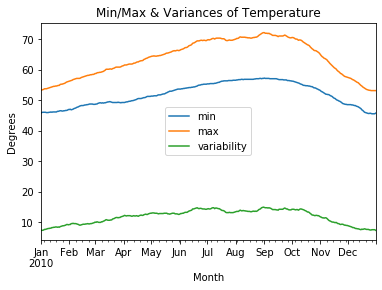

In [18]:
df.plot()
plt.title('Min/Max & Variances of Temperature')
plt.xlabel('Month')
plt.ylabel('Degrees')

In [30]:
temp_reading = df.resample('D').variability.max().idxmax()
temp_reading
warmest_month = df.idxmax()[1]
warmest_month = warmest_month.strftime('%B')
print(f'{warmest_month} was the the month with the highest variability')

August was the the month with the highest variability


In [24]:
warmest_month = df.idxmax()
warmest_month

min           2010-09-01
max           2010-08-31
variability   2010-08-31
dtype: datetime64[ns]

In [26]:
temp_reading

Timestamp('2010-08-31 00:00:00', freq='D')

In [ ]:
# Checking the date showing the highest variability
var = df['2010-08-31':'2010-08-31'].variability

In [ ]:
var

# Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [34]:
df = data.sf_temps()
df = df.set_index('date').sort_index()
df = df.resample('D')['temp'].agg(['min','mean','max'])

Text(0, 0.5, 'Temperature')

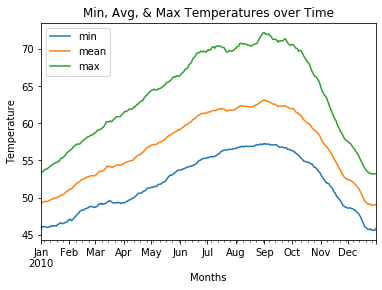

In [35]:
df.plot()
plt.title('Min, Avg, & Max Temperatures over Time')
plt.xlabel("Months")
plt.ylabel('Temperature')

# Seatles weather

In [36]:
seatle = data.seattle_weather()

In [37]:
seatle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [38]:
seatle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [ ]:
#seatle['year'] = seatle.date.dt.year
#seatle['month'] = seatle.date.dt.month
#seatle['day'] = seatle.date.dt.day

In [39]:
seatle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [40]:
seatle = seatle.set_index('date').sort_index()

In [41]:
seatle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


# 1. Which year and month combination has the highest amount of precipitation?

In [42]:
seatle.shape

(1461, 5)

In [44]:
seatle.resample('M').precipitation.sum().sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

In [47]:
seatle.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

# 2. Visualize the amount of monthly precipitation over time.

Text(0, 0.5, 'Units of Rain')

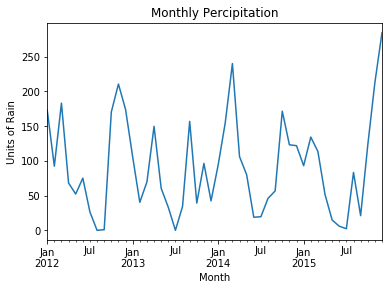

In [48]:
seatle.resample('M').precipitation.sum().plot()
plt.title('Monthly Percipitation')
plt.xlabel('Month')
plt.ylabel('Units of Rain')

# 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [49]:
# Creating a year window
df2 = seatle['2015-01-01':'2015-12-31']
df2

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-01-01,0.0,5.6,-3.2,1.2,sun
2015-01-02,1.5,5.6,0.0,2.3,fog
2015-01-03,0.0,5.0,1.7,1.7,fog
2015-01-04,10.2,10.6,3.3,4.5,fog
2015-01-05,8.1,12.2,9.4,6.4,fog
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


Text(0, 0.5, 'Wind Speed')

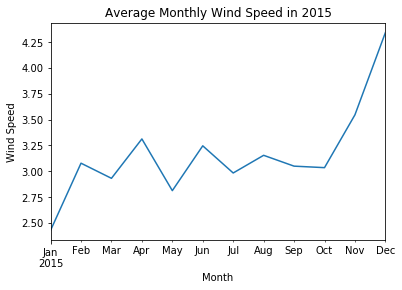

In [50]:
df2.resample('M').wind.mean().plot()
plt.title('Average Monthly Wind Speed in 2015')
plt.xlabel('Month')
plt.ylabel('Wind Speed')

# 4. Which year-month combination is the windiest?

In [52]:
seatle.resample('M').wind.mean().idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

In [53]:
seatle.wind.resample('M').mean().sort_values().tail()

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

## February 2014 was the windest month/year combination

# 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [58]:
# Unable to get weather.mean() because it is an object. Hint we have to create a boolean mask
sunny = seatle['weather'] == 'sun'
sunny.head()

date
2012-01-01    False
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
Name: weather, dtype: bool

In [59]:
# Have a df showing only the sunny days
df = seatle[sunny]
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun


In [60]:
df.resample('Y').weather.count().idxmax()
# 2014 had the sunniest year

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

# 6. In which month does it rain the most?

In [61]:
seatle.resample('M').precipitation.mean().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [64]:
seatle['month'] = seatle.index.month

In [67]:
# November is the rainest
seatle.groupby("month").sum()

,precipitation,temp_max,temp_min,wind
month,,,,
1,466.0,1020.4,334.4,389.2
2,422.0,1114.2,458.2,427.9
3,606.2,1536.0,602.5,443.9
4,375.4,1802.4,763.5,422.9
5,207.5,2392.7,1192.2,386.9
6,132.9,2688.0,1469.3,375.7
7,48.2,3223.8,1760.5,361.0
8,163.7,3237.9,1831.4,341.1
9,235.5,2630.9,1483.0,355.6


# 7. Which month has the most number of days with a non-zero amount of precipitation?

In [68]:
rainy = seatle[seatle.precipitation != 0]

In [69]:
# df that has day of rain
rainy.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-02,10.9,10.6,2.8,4.5,rain,1
2012-01-03,0.8,11.7,7.2,2.3,rain,1
2012-01-04,20.3,12.2,5.6,4.7,rain,1
2012-01-05,1.3,8.9,2.8,6.1,rain,1
2012-01-06,2.5,4.4,2.2,2.2,rain,1


In [70]:
rainy.groupby([rainy.index.month], as_index = True).precipitation.count()

date
1     66
2     73
3     73
4     59
5     34
6     37
7     11
8     22
9     35
10    61
11    71
12    81
Name: precipitation, dtype: int64

In [71]:
rainy.groupby([rainy.index.month], as_index=True).precipitation.count().idxmax()

12

In [72]:
rainy.groupby([rainy.index.month], as_index=True).precipitation.count().max()

81

# Data Flights

In [73]:
flights = data.flights_20k()

In [74]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [75]:
flights.shape

(20000, 5)

In [76]:
flights.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [77]:
#flights['year'] = flights.date.dt.year
#flights['month'] = flights.date.dt.month
#flights['day'] = flights.date.dt.day
#flights['hour'] = flights.date.dt.hour
#flights['minute'] = flights.date.dt.minute
#flights['second'] = flights.date.dt.second

In [78]:
flights = flights.set_index('date').sort_index()

In [79]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


# 1. Convert any negative delays to 0.

In [80]:
# .clip() Given an interval, values outside the interval are clipped to the interval edges. For example, if an 
# interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
flights['delay'] = flights.delay.clip(lower=0)

# Can also use flights.loc[(flights.delay < 0),'delay'] = 0

In [81]:
# different way to get delays that are negative to 0
# Where condition true, value, if false value
#np.where(df.delay < 0, 0, df.delay)

In [82]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


# 2. Which hour of the day has the highest average delay? 

In [83]:
flights.resample("H").delay.mean().idxmax()

Timestamp('2001-02-23 03:00:00', freq='H')

In [85]:
# Another example of how to 
flights['hour'] = flights.index.hour
flights.groupby('hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [86]:
# Shows list with the highest average delay
flights.groupby([flights.index.hour]).delay.mean()

date
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [87]:
# Shows how many mins delayed
flights.groupby([flights.index.hour]).delay.mean().max()

302.5

In [88]:
# Shows the hr
flights.groupby([flights.index.hour]).delay.mean().idxmax()

3

# 3. Does the day of the week make a difference in the delay amount?

In [89]:
# When using the .weekday property, Monday = 0 and Sunday = 6. You can see Friday has the highest delay amount
# out of any other day. Want to travel monday, tuesday, or saturday based on the averages seen below
flights.groupby([flights.index.weekday]).delay.mean()

date
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

In [92]:
# Another way to calculate
flights['day_of_week'] = flights.index.day_name()
flights.groupby('day_of_week').delay.mean().sort_values()

day_of_week
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

# 4. Does the month make a difference in the delay amount?

In [93]:
flights.groupby([flights.index.month]).delay.mean()

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

In [94]:
flights.resample('M').delay.mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

In [95]:
# February shows a larger delay than January 

# Bonus

In [ ]:
df = data.iowa_electricity()
df.head()

In [ ]:
df.shape

In [ ]:
df_yr = df.set_index(df.index.year)
df_yr.index.name = 'year'
df_yr.head()

In [ ]:
df.info()

# 1. For each row, calculate the percentage of the year's total that energy source provided.

In [ ]:
# This shows the total energy produced per year
yearly_prod = df.resample('Y').net_generation.sum()
yearly_prod = pd.DataFrame("yearly_prod")

In [ ]:
# Reseting index to read the year and creating a total production column
df = yearly_prod.join(opsd_annual, how='outer')
df.head()